In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns

### Background

This dataset is about manufacturing machines operating in a workshop environment. The goal is to predict whether the machines will fail or not based on the independent variables. This is so that companies can perhaps schedule maintanence smartly as they would be able to predict machine status, thus reduce downtime.

In [2]:
df = pd.read_csv(r"machine_failure_data(in).csv")

In [3]:
df.head()

,UDI,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure
0,1,M,298.1,323.740741,1551,42.8,0,0
1,2,L,298.2,324.111111,1408,46.3,3,0
2,3,L,298.1,323.370370,1498,49.4,5,0
3,4,L,298.2,323.740741,1433,39.5,7,0
4,5,L,298.2,324.111111,1408,40.0,9,0


In [4]:
df["UDI"].nunique()

10000

In [5]:
df.shape

(10000, 8)

### Data Insights

In [6]:
df["Delta T"] = df["Process temperature"] - df["Air temperature"] 

In [7]:
df.head(1)

,UDI,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure,Delta T
0,1,M,298.1,323.740741,1551,42.8,0,0,25.640741


In [8]:
df[["Process temperature", "Air temperature", "Delta T"]]

,Process temperature,Air temperature,Delta T
0,323.740741,298.1,25.640741
1,324.111111,298.2,25.911111
2,323.370370,298.1,25.270370
3,323.740741,298.2,25.540741
4,324.111111,298.2,25.911111
...,...,...,...
9995,323.000000,298.8,24.200000
9996,323.000000,298.9,24.100000
9997,323.740741,299.0,24.740741
9998,324.111111,299.0,25.111111


In [9]:
import matplotlib.pyplot as plt

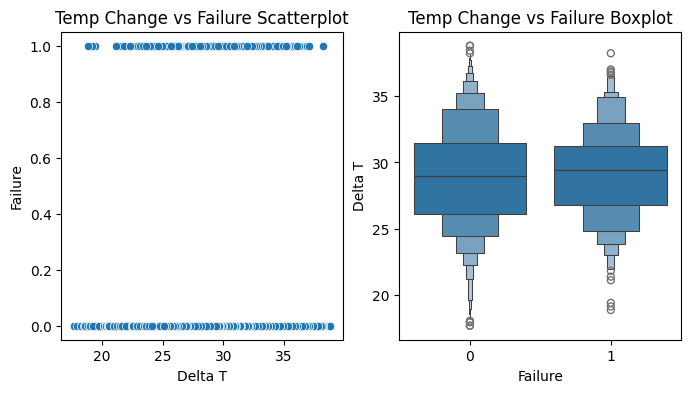

In [10]:
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df["Delta T"], y=df["Failure"], data=df)
plt.title("Temp Change vs Failure Scatterplot")

plt.subplot(1, 2, 2)
sns.boxenplot(x=df["Failure"], y=df["Delta T"])
plt.title("Temp Change vs Failure Boxplot")

plt.show()

This is to measure thermal stress, as machines wont fail just due to high temps. High thermal stress would mean high rate of degredation which leads to failure. 

The scatter plot shows that at higher tempurature changes, failure will most likely happen, but due to the significant overlap between failure and non-failure, temperature change itself is not a considerable factor in determining failure. 

The same can be said about the box plot, where the median temperature difference is higher for failure, showing that failure is likely to occur at higher thermal stress. However, the substantial interquartile range shows that thermal stress is not a very key factor determaining failure.

In [11]:
df["Power Index"] = df["Torque"] * df["Rotational speed"] 

In [12]:
df[["Torque", "Rotational speed", "Power Index"]]

,Torque,Rotational speed,Power Index
0,42.8,1551,66382.8
1,46.3,1408,65190.4
2,49.4,1498,74001.2
3,39.5,1433,56603.5
4,40.0,1408,56320.0
...,...,...,...
9995,29.5,1604,47318.0
9996,31.8,1632,51897.6
9997,33.4,1645,54943.0
9998,48.5,1408,68288.0


Text(0.5, 1.0, 'Power Index vs Failure Scatterplot')

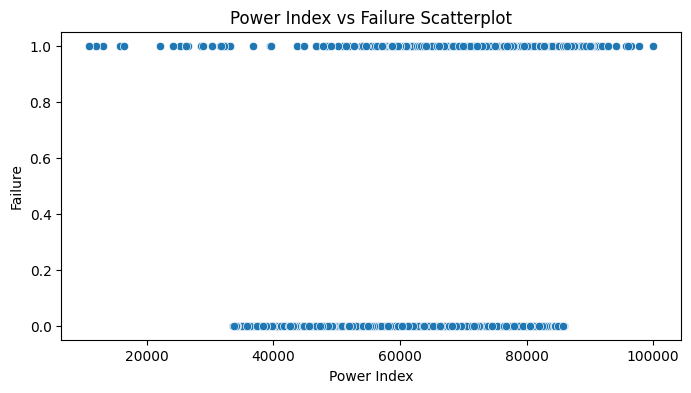

In [13]:
plt.figure(figsize=(8,4))

sns.scatterplot(x=df["Power Index"], y=df["Failure"], data=df)
plt.title("Power Index vs Failure Scatterplot")

Torque on its own is not enough for failure. High rotational speed at high torque can cause vibration, fatigue, and bearing wear. This can measured using the formula:

Power Index=Torque×RPM

Where the power index should capture real physical stress. 

The scatter plot shows that failure is more likely to occur at high power indexes where they would have higher mechanical stress. However, there is overlap for non-failure at similar power index values, so this may not be a determining factor for machine failure.

Text(0.5, 1.0, 'Failure rate vs Tool wear')

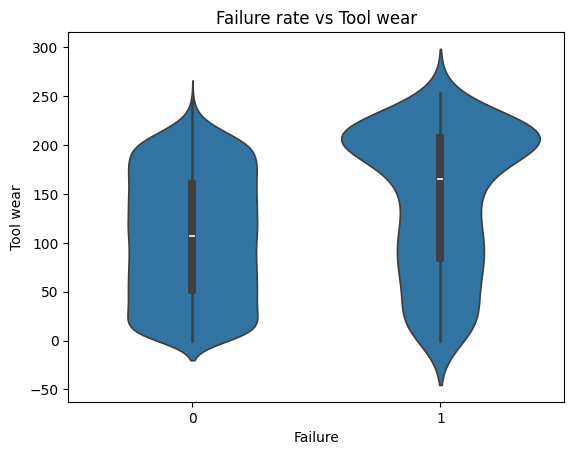

In [14]:
plt.Figure()

sns.violinplot(x=df["Failure"], y=df["Tool wear"])
plt.title("Failure rate vs Tool wear")

Tool wear is not gradual. Engineering systems dictate that there is a safe zone, rapid risk zone, and critical failure zone. 

The violin plot shows that for failure, the distribution for low level tear is low, representing the safe zone. However, there is a rapid high distribution at higher total wear, indicating a rapid risk to critical failure zone, and the process itself does not happen gradually. This means there could be a certain threshold for the total wear to pass in order for the probability of higher failure rate to occur.

In [15]:
df.drop(['UDI'], axis=1, inplace=True)
df.drop(['Delta T'], axis=1, inplace=True)
df.drop(['Power Index'], axis=1, inplace=True)

In [16]:
df.shape

(10000, 7)

In [17]:
df.info

<bound method DataFrame.info of      Type  Air temperature  Process temperature  Rotational speed  Torque  \
0       M            298.1           323.740741              1551    42.8   
1       L            298.2           324.111111              1408    46.3   
2       L            298.1           323.370370              1498    49.4   
3       L            298.2           323.740741              1433    39.5   
4       L            298.2           324.111111              1408    40.0   
...   ...              ...                  ...               ...     ...   
9995    M            298.8           323.000000              1604    29.5   
9996    H            298.9           323.000000              1632    31.8   
9997    M            299.0           323.740741              1645    33.4   
9998    H            299.0           324.111111              1408    48.5   
9999    M            299.0           324.111111              1500    40.2   

      Tool wear  Failure  
0             0 

In [18]:
df.describe()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,328.946519,1538.776100,39.986910,107.951000,0.033900
std,2.000259,5.495312,179.284096,9.968934,63.654147,0.180981
min,295.300000,313.000000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,324.481481,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,329.296296,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,333.000000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,343.000000,2886.000000,76.600000,253.000000,1.000000


In [19]:
df.dtypes

Type                       str
Air temperature        float64
Process temperature    float64
Rotational speed         int64
Torque                 float64
Tool wear                int64
Failure                  int64
dtype: object

In [20]:
df.isna().sum()

Type                   0
Air temperature        0
Process temperature    0
Rotational speed       0
Torque                 0
Tool wear              0
Failure                0
dtype: int64

In [21]:
df.duplicated().sum()

np.int64(0)

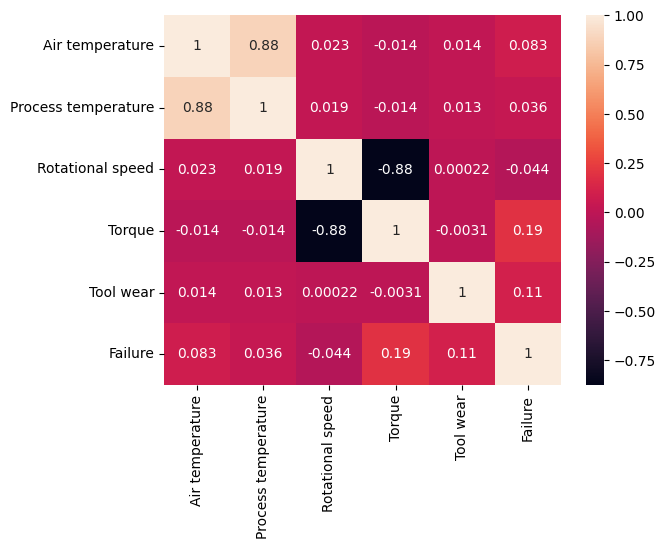

In [22]:
plt.Figure()
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True)
plt.show()

<Axes: xlabel='Failure', ylabel='Wear_Temp_Interaction'>

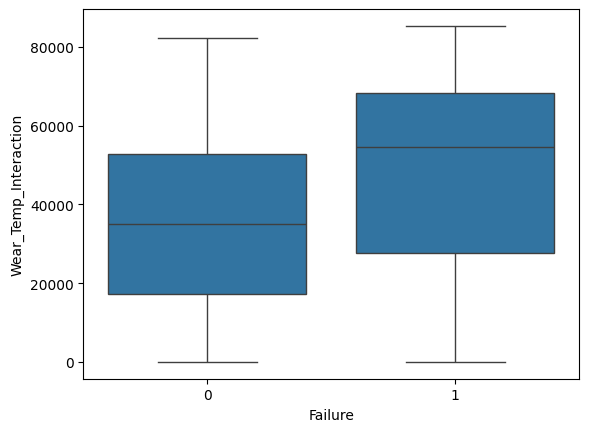

In [35]:
df["Wear_Temp_Interaction"] = df["Tool wear"] * df["Process temperature"]

df[["Wear_Temp_Interaction","Failure"]].corr()

sns.boxplot(x="Failure", y="Wear_Temp_Interaction", data=df)

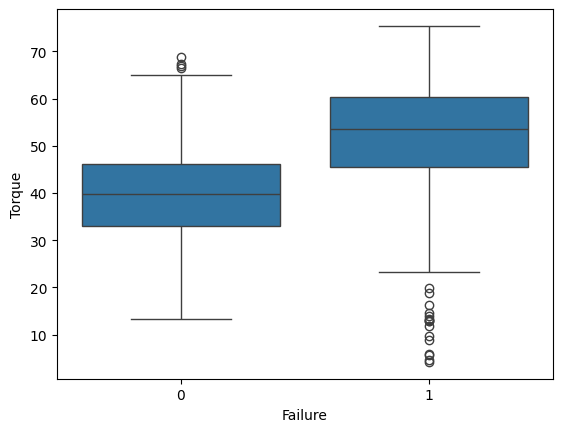

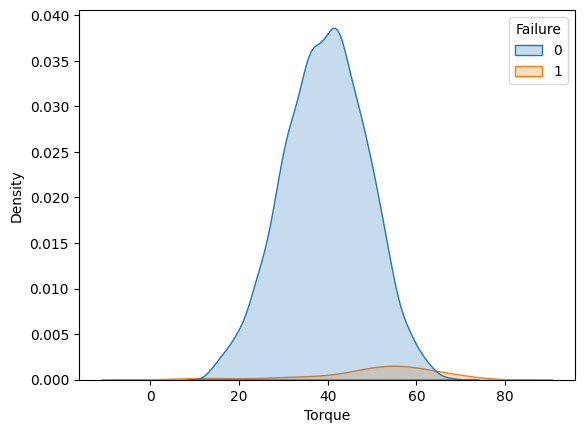

In [38]:
high_wear = df[df["Tool wear"] > df["Tool wear"].median()]

sns.boxplot(x="Failure", y="Torque", data=high_wear)
plt.show()

sns.kdeplot(data=high_wear, x="Torque", hue="Failure", fill=True)
plt.show()

TypeError: Boolean array expected for the condition, not int64

In [36]:
from sklearn.linear_model import LogisticRegression

X = df[["Tool wear", "Process temperature"]]
X["Interaction"] = X["Tool wear"] * X["Process temperature"]

y = df["Failure"]

model = LogisticRegression()
model.fit(X, y)

print(model.coef_)

[[-0.06755061 -0.01383942  0.00023432]]


### Logistic Regression 

In [24]:
from sklearn.preprocessing import LabelEncoder

lab_en = LabelEncoder()

df["Type"] = lab_en.fit_transform(df["Type"])

In [25]:
df.head(2)

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure
0,2,298.1,323.740741,1551,42.8,0,0
1,1,298.2,324.111111,1408,46.3,3,0


### Logistic Regression on Baseline

In [26]:
from sklearn.linear_model import LogisticRegression

X = df.drop(['Failure'], axis=1)
y = df['Failure']



In [27]:
X.columns

Index(['Type', 'Air temperature', 'Process temperature', 'Rotational speed',
       'Torque', 'Tool wear'],
      dtype='str')

In [28]:
from sklearn.model_selection import train_test_split

# Split off test set first (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split remaining 80% into train (75% of 80% = 60% total) and val (25% of 80% = 20% total)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Verify sizes
print(f"Training set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Validation set: {len(X_val)} samples ({len(X_val)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

Training set: 6000 samples (60.0%)
Validation set: 2000 samples (20.0%)
Test set: 2000 samples (20.0%)


#### Training

In [29]:
log_reg = LogisticRegression()

log_reg.fit(X,y)

c:\Users\abrar\Desktop\ITC Training\Week 2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

#### Validation

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report

In [31]:
y_train_pred = log_reg.predict(X_train)
print("TRAIN SET PERFORMANCE:")
print(f'Confusion Matrix: \n{confusion_matrix(y_train, y_train_pred)}')
print(f'Accuracy: {accuracy_score(y_train, y_train_pred):.4f}')
print(f'Precision: {precision_score(y_train, y_train_pred):.4f}')
print(f'Classification Report: \n{classification_report(y_train, y_train_pred)}')

TRAIN SET PERFORMANCE:
Confusion Matrix: 
[[5779    3]
 [ 183   35]]
Accuracy: 0.9690
Precision: 0.9211
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5782
           1       0.92      0.16      0.27       218

    accuracy                           0.97      6000
   macro avg       0.95      0.58      0.63      6000
weighted avg       0.97      0.97      0.96      6000



In [32]:
y_val_pred = log_reg.predict(X_val)
print("VALIDATION SET PERFORMANCE:")
print(f'Confusion Matrix: \n{confusion_matrix(y_val, y_val_pred)}')
print(f'Accuracy: {accuracy_score(y_val, y_val_pred):.4f}')
print(f'Precision: {precision_score(y_val, y_val_pred):.4f}')
print(f'Classification Report: \n{classification_report(y_val, y_val_pred)}')

VALIDATION SET PERFORMANCE:
Confusion Matrix: 
[[1939    1]
 [  48   12]]
Accuracy: 0.9755
Precision: 0.9231
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1940
           1       0.92      0.20      0.33        60

    accuracy                           0.98      2000
   macro avg       0.95      0.60      0.66      2000
weighted avg       0.97      0.98      0.97      2000



#### Test

In [33]:
y_test_pred = log_reg.predict(X_test)
print("TEST SET PERFORMANCE (FINAL):")
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_test_pred)}')
print(f'Accuracy: {accuracy_score(y_test, y_test_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_test_pred):.4f}')
print(f'Classification Report: \n{classification_report(y_test, y_test_pred)}')

TEST SET PERFORMANCE (FINAL):
Confusion Matrix: 
[[1934    5]
 [  48   13]]
Accuracy: 0.9735
Precision: 0.7222
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.72      0.21      0.33        61

    accuracy                           0.97      2000
   macro avg       0.85      0.61      0.66      2000
weighted avg       0.97      0.97      0.97      2000



From the confusion matrix, it is shown that the model correctly predicted "no failure" 1934 times. It also has 5 false alarms, and caught 15 failures. However it has a high number of missed failures that are actually failures (46), which should be alarming. 

Although the accuracy is high, this may be very misleading as it could predict "no failure for everything".

For precision it is relatively good at 75%, meaning that it is correct 75% of the time when detecting failure. 

Its recall is terrible as it would catch only 25% of the actual failures, which can be dangerous if put into production.

For the classification report, it is shown that the model can catch machines that wont fail due to high accuracy, precision, recall, and F1 scores.

However, for failures it subpar. A good F1 score should be 70% but it is 37%, which is terrible. 

In summary the model is good at recognising non failures but performs poorly when detecting failures.

In [34]:
df.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure
0,2,298.1,323.740741,1551,42.8,0,0
1,1,298.2,324.111111,1408,46.3,3,0
2,1,298.1,323.370370,1498,49.4,5,0
3,1,298.2,323.740741,1433,39.5,7,0
4,1,298.2,324.111111,1408,40.0,9,0
